In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [271]:
data = pd.read_csv('cardekho.csv')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [273]:
# replace ' ' with NaN
data.replace(' ', np.nan, inplace=True)
data['max_power'] = data['max_power'].astype(float)


In [274]:
# group by car name and fill null values in engine, power, seats with mean of that car
data['engine'] = data.groupby('name')['engine'].transform(lambda x: x.fillna(x.mean()))
data['max_power'] = data.groupby('name')['max_power'].transform(lambda x: x.fillna(x.mean()))
data['seats'] = data.groupby('name')['seats'].transform(lambda x: x.fillna(x.mean()))

In [275]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7968 non-null   float64
 10  max_power           7967 non-null   float64
 11  seats               7968 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [276]:
data.dropna(inplace=True)

In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                7906 non-null   object 
 1   year                7906 non-null   int64  
 2   selling_price       7906 non-null   int64  
 3   km_driven           7906 non-null   int64  
 4   fuel                7906 non-null   object 
 5   seller_type         7906 non-null   object 
 6   transmission        7906 non-null   object 
 7   owner               7906 non-null   object 
 8   mileage(km/ltr/kg)  7906 non-null   float64
 9   engine              7906 non-null   float64
 10  max_power           7906 non-null   float64
 11  seats               7906 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 803.0+ KB


In [278]:
#rename mileage column
data.rename(columns={'mileage(km/ltr/kg)':'mileage_kmpl'}, inplace=True)

In [279]:
#reset index
data.reset_index(drop=True, inplace=True)

In [280]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [281]:
data['manufacturer'] = data['name'].apply(lambda x: x.split()[0].lower())

In [282]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine,max_power,seats,manufacturer
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,maruti


In [283]:
data['owner'] = data['owner'].apply(lambda x: x.split()[0].lower())

In [284]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine,max_power,seats,manufacturer
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,first,23.40,1248.0,74.00,5.0,maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,second,21.14,1498.0,103.52,5.0,skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,third,17.70,1497.0,78.00,5.0,honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,first,23.00,1396.0,90.00,5.0,hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,first,16.10,1298.0,88.20,5.0,maruti


In [285]:
data['manufacturer'].value_counts()

manufacturer
maruti           2367
hyundai          1360
mahindra          758
tata              719
honda             466
toyota            452
ford              388
chevrolet         230
renault           228
volkswagen        185
bmw               118
skoda             104
nissan             81
jaguar             71
volvo              67
datsun             65
mercedes-benz      54
fiat               41
audi               40
lexus              34
jeep               31
mitsubishi         14
force               6
land                6
isuzu               5
kia                 4
ambassador          4
daewoo              3
mg                  3
ashok               1
opel                1
Name: count, dtype: int64

In [286]:
# remove manufacturer with less than 10 cars
data = data.groupby('manufacturer').filter(lambda x: len(x) > 10)


In [287]:
data['manufacturer'].value_counts()

manufacturer
maruti           2367
hyundai          1360
mahindra          758
tata              719
honda             466
toyota            452
ford              388
chevrolet         230
renault           228
volkswagen        185
bmw               118
skoda             104
nissan             81
jaguar             71
volvo              67
datsun             65
mercedes-benz      54
fiat               41
audi               40
lexus              34
jeep               31
mitsubishi         14
Name: count, dtype: int64

In [288]:
data.groupby('manufacturer')['selling_price'].mean().sort_values(ascending=False)

manufacturer
lexus            5.150000e+06
bmw              4.153814e+06
volvo            3.272015e+06
jaguar           2.915465e+06
audi             2.612200e+06
mercedes-benz    2.470444e+06
jeep             2.149613e+06
toyota           1.011920e+06
mitsubishi       8.175000e+05
mahindra         6.300211e+05
skoda            6.097211e+05
honda            5.969209e+05
ford             5.208737e+05
volkswagen       4.898919e+05
hyundai          4.732805e+05
nissan           4.654074e+05
renault          4.626184e+05
maruti           4.090111e+05
tata             3.618538e+05
fiat             3.171951e+05
datsun           3.146000e+05
chevrolet        2.738675e+05
Name: selling_price, dtype: float64

In [289]:
high_end = ['bmw', 'jaguar', 'audi', 'mercedes-benz', 'lexus', 'jeep']
data['high_end'] = data['manufacturer'].apply(lambda x: 1 if x in high_end else 0)
data.drop('manufacturer', axis=1, inplace=True)

In [290]:
data.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine,max_power,seats,high_end
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,first,23.40,1248.0,74.00,5.0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,second,21.14,1498.0,103.52,5.0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,third,17.70,1497.0,78.00,5.0,0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,first,23.00,1396.0,90.00,5.0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,first,16.10,1298.0,88.20,5.0,0


In [291]:
data['owner'] = data['owner'].apply(lambda x: 'first' if x == 'test' else x)
data['owner'] = data['owner'].apply(lambda x: 'higher' if x in ['third', 'fourth'] else x)
data['owner'].value_counts()

owner
first     5196
second    2010
higher     667
Name: count, dtype: int64

In [292]:
data['seats'].value_counts() 

seats
5.0     6233
7.0     1109
8.0      234
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: count, dtype: int64

In [293]:
data = data.groupby('seats').filter(lambda x: len(x) > 10)

In [294]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7870 entries, 0 to 7905
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7870 non-null   object 
 1   year           7870 non-null   int64  
 2   selling_price  7870 non-null   int64  
 3   km_driven      7870 non-null   int64  
 4   fuel           7870 non-null   object 
 5   seller_type    7870 non-null   object 
 6   transmission   7870 non-null   object 
 7   owner          7870 non-null   object 
 8   mileage_kmpl   7870 non-null   float64
 9   engine         7870 non-null   float64
 10  max_power      7870 non-null   float64
 11  seats          7870 non-null   float64
 12  high_end       7870 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 860.8+ KB


In [295]:
data = data[(data['fuel'] != 'CNG') & (data['fuel'] != 'LPG')]

In [296]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7783 entries, 0 to 7905
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7783 non-null   object 
 1   year           7783 non-null   int64  
 2   selling_price  7783 non-null   int64  
 3   km_driven      7783 non-null   int64  
 4   fuel           7783 non-null   object 
 5   seller_type    7783 non-null   object 
 6   transmission   7783 non-null   object 
 7   owner          7783 non-null   object 
 8   mileage_kmpl   7783 non-null   float64
 9   engine         7783 non-null   float64
 10  max_power      7783 non-null   float64
 11  seats          7783 non-null   float64
 12  high_end       7783 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 851.3+ KB


In [297]:
data.drop('name', axis=1, inplace=True)

In [298]:
data.head(5)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine,max_power,seats,high_end
0,2014,450000,145500,Diesel,Individual,Manual,first,23.40,1248.0,74.00,5.0,0
1,2014,370000,120000,Diesel,Individual,Manual,second,21.14,1498.0,103.52,5.0,0
2,2006,158000,140000,Petrol,Individual,Manual,higher,17.70,1497.0,78.00,5.0,0
3,2010,225000,127000,Diesel,Individual,Manual,first,23.00,1396.0,90.00,5.0,0
4,2007,130000,120000,Petrol,Individual,Manual,first,16.10,1298.0,88.20,5.0,0


In [299]:
data['km_driven_log'] = np.log(data['km_driven'])
data['selling_price_log'] = np.log(data['selling_price'])
data['transmission'] = data['transmission'].apply(lambda x: 1 if x == 'Automatic' else 0)
data['fuel'] = data['fuel'].apply(lambda x: 1 if x == 'Diesel' else 0)


In [300]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine,max_power,seats,high_end,km_driven_log,selling_price_log
0,2014,450000,145500,1,Individual,0,first,23.40,1248.0,74.00,5.0,0,11.887931,13.017003
1,2014,370000,120000,1,Individual,0,second,21.14,1498.0,103.52,5.0,0,11.695247,12.821258
2,2006,158000,140000,0,Individual,0,higher,17.70,1497.0,78.00,5.0,0,11.849398,11.970350
3,2010,225000,127000,1,Individual,0,first,23.00,1396.0,90.00,5.0,0,11.751942,12.323856
4,2007,130000,120000,0,Individual,0,first,16.10,1298.0,88.20,5.0,0,11.695247,11.775290


In [301]:
data['seller_type'].value_counts()

seller_type
Individual          6454
Dealer              1093
Trustmark Dealer     236
Name: count, dtype: int64

In [302]:
data.groupby(['seller_type', 'owner', 'high_end'])['selling_price'].mean()


seller_type       owner   high_end
Dealer            first   0           7.464368e+05
                          1           4.025384e+06
                  higher  0           2.962500e+05
                  second  0           5.976000e+05
                          1           1.546571e+06
Individual        first   0           5.769871e+05
                          1           2.360652e+06
                  higher  0           2.692875e+05
                          1           1.077857e+06
                  second  0           3.648621e+05
                          1           1.567355e+06
Trustmark Dealer  first   0           8.127291e+05
                  second  0           7.348485e+05
Name: selling_price, dtype: float64

In [303]:
data['seller_type'] = data['seller_type'].apply(lambda x: 1 if x == 'Individual' else 0)
data = pd.get_dummies(data, columns=['owner'], prefix='', prefix_sep='', dtype=int)

In [304]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,mileage_kmpl,engine,max_power,seats,high_end,km_driven_log,selling_price_log,first,higher,second
0,2014,450000,145500,1,1,0,23.40,1248.0,74.00,5.0,0,11.887931,13.017003,1,0,0
1,2014,370000,120000,1,1,0,21.14,1498.0,103.52,5.0,0,11.695247,12.821258,0,0,1
2,2006,158000,140000,0,1,0,17.70,1497.0,78.00,5.0,0,11.849398,11.970350,0,1,0
3,2010,225000,127000,1,1,0,23.00,1396.0,90.00,5.0,0,11.751942,12.323856,1,0,0
4,2007,130000,120000,0,1,0,16.10,1298.0,88.20,5.0,0,11.695247,11.775290,1,0,0


In [305]:
data['age'] = 2021 - data['year']
data.drop('higher', axis=1, inplace=True)

In [306]:
data.head(20)

,year,selling_price,km_driven,fuel,seller_type,transmission,mileage_kmpl,engine,max_power,seats,high_end,km_driven_log,selling_price_log,first,second,age
0,2014,450000,145500,1,1,0,23.40,1248.0,74.00,5.0,0,11.887931,13.017003,1,0,7
1,2014,370000,120000,1,1,0,21.14,1498.0,103.52,5.0,0,11.695247,12.821258,0,1,7
2,2006,158000,140000,0,1,0,17.70,1497.0,78.00,5.0,0,11.849398,11.970350,0,0,15
3,2010,225000,127000,1,1,0,23.00,1396.0,90.00,5.0,0,11.751942,12.323856,1,0,11
4,2007,130000,120000,0,1,0,16.10,1298.0,88.20,5.0,0,11.695247,11.775290,1,0,14
5,2017,440000,45000,0,1,0,20.14,1197.0,81.86,5.0,0,10.714418,12.994530,1,0,4
7,2001,45000,5000,0,1,0,16.10,796.0,37.00,4.0,0,8.517193,10.714418,0,1,20
8,2011,350000,90000,1,1,0,23.59,1364.0,67.10,5.0,0,11.407565,12.765688,1,0,10
9,2013,200000,169000,1,1,0,20.00,1399.0,68.10,5.0,0,12.037654,12.206073,1,0,8
10,2014,500000,68000,1,1,0,19.01,1461.0,108.45,5.0,0,11.127263,13.122363,0,1,7


In [307]:
numeric_data = data.select_dtypes(include=[np.number])
numeric_data.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'mileage_kmpl', 'engine', 'max_power', 'seats',
       'high_end', 'km_driven_log', 'selling_price_log', 'first', 'second',
       'age'],
      dtype='object')

<Axes: >

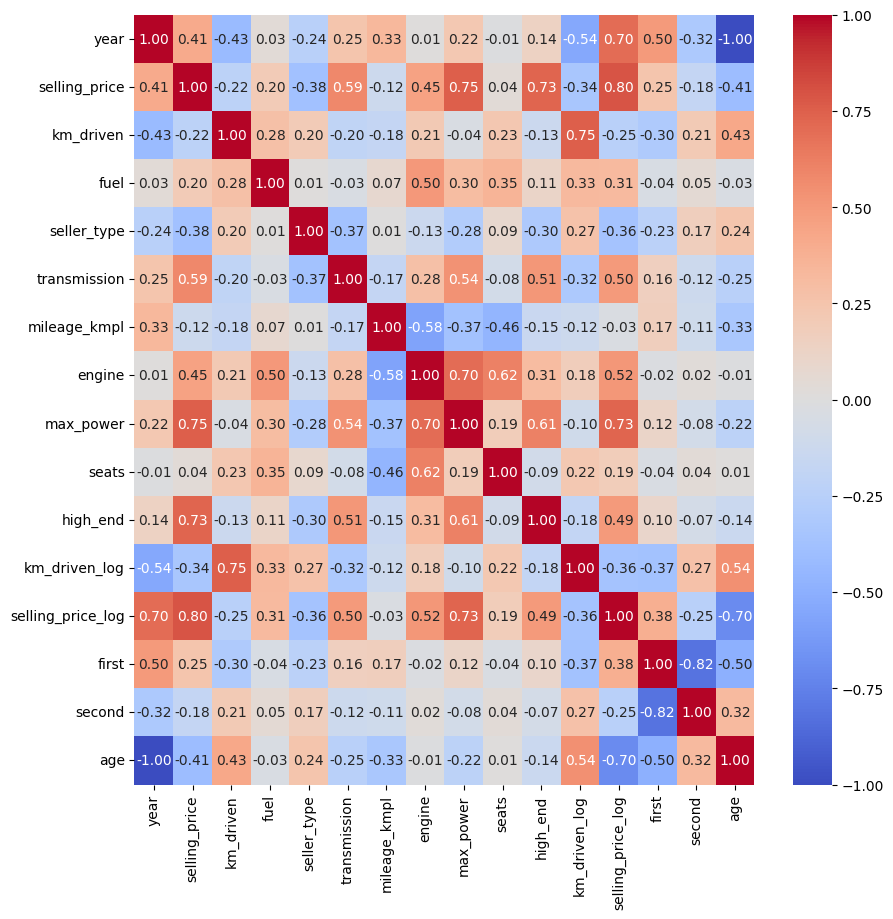

In [308]:
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt = '.2f', center=0)    

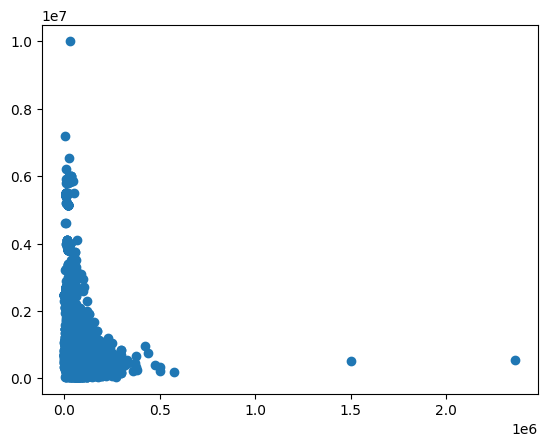

In [309]:
plt.scatter(data['km_driven'], data['selling_price'])

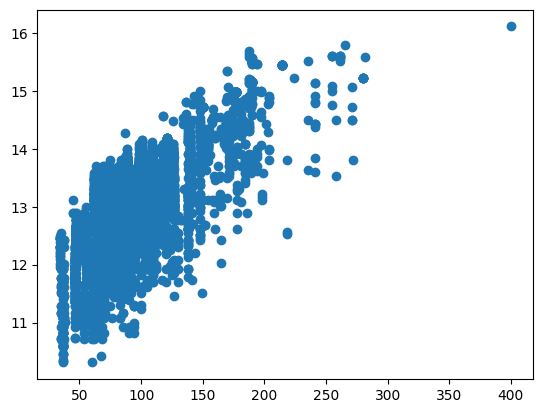

In [310]:
plt.scatter(data['max_power'], data['selling_price_log'])

In [311]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,mileage_kmpl,engine,max_power,seats,high_end,km_driven_log,selling_price_log,first,second,age
0,2014,450000,145500,1,1,0,23.40,1248.0,74.00,5.0,0,11.887931,13.017003,1,0,7
1,2014,370000,120000,1,1,0,21.14,1498.0,103.52,5.0,0,11.695247,12.821258,0,1,7
2,2006,158000,140000,0,1,0,17.70,1497.0,78.00,5.0,0,11.849398,11.970350,0,0,15
3,2010,225000,127000,1,1,0,23.00,1396.0,90.00,5.0,0,11.751942,12.323856,1,0,11
4,2007,130000,120000,0,1,0,16.10,1298.0,88.20,5.0,0,11.695247,11.775290,1,0,14


In [312]:
data.describe()

,year,selling_price,km_driven,fuel,seller_type,transmission,mileage_kmpl,engine,max_power,seats,high_end,km_driven_log,selling_price_log,first,second,age
count,7783.000000,7.783000e+03,7.783000e+03,7783.000000,7783.000000,7783.000000,7783.000000,7783.000000,7783.000000,7783.000000,7783.000000,7783.000000,7783.000000,7783.000000,7783.000000,7783.000000
mean,2013.990364,6.504858e+05,6.920358e+04,0.548632,0.829243,0.131697,19.416097,1460.795966,91.852112,5.419633,0.044713,10.848923,13.003007,0.660799,0.254658,7.009636
std,3.840201,8.123489e+05,5.689836e+04,0.497661,0.376320,0.338183,3.979199,503.153763,35.716514,0.956083,0.206686,0.870940,0.824988,0.473469,0.435697,3.840201
min,1994.000000,2.999900e+04,1.000000e+03,0.000000,0.000000,0.000000,0.000000,624.000000,34.200000,4.000000,0.000000,6.907755,10.308919,0.000000,0.000000,1.000000
25%,2012.000000,2.700000e+05,3.500000e+04,0.000000,1.000000,0.000000,16.780000,1197.000000,69.000000,5.000000,0.000000,10.463103,12.506177,0.000000,0.000000,4.000000
50%,2015.000000,4.519990e+05,6.000000e+04,1.000000,1.000000,0.000000,19.300000,1248.000000,82.400000,5.000000,0.000000,11.002100,13.021435,1.000000,0.000000,6.000000
75%,2017.000000,6.900000e+05,9.600000e+04,1.000000,1.000000,0.000000,22.320000,1582.000000,102.000000,5.000000,0.000000,11.472103,13.444447,1.000000,1.000000,9.000000
max,2020.000000,1.000000e+07,2.360457e+06,1.000000,1.000000,1.000000,42.000000,3604.000000,400.000000,10.000000,1.000000,14.674366,16.118096,1.000000,1.000000,27.000000


In [313]:
data.drop(columns=['year', 'km_driven', 'selling_price', 'seats'], inplace=True)

In [314]:
data.head()

,fuel,seller_type,transmission,mileage_kmpl,engine,max_power,high_end,km_driven_log,selling_price_log,first,second,age
0,1,1,0,23.40,1248.0,74.00,0,11.887931,13.017003,1,0,7
1,1,1,0,21.14,1498.0,103.52,0,11.695247,12.821258,0,1,7
2,0,1,0,17.70,1497.0,78.00,0,11.849398,11.970350,0,0,15
3,1,1,0,23.00,1396.0,90.00,0,11.751942,12.323856,1,0,11
4,0,1,0,16.10,1298.0,88.20,0,11.695247,11.775290,1,0,14


In [315]:
from sklearn.preprocessing import StandardScaler

In [316]:
scalers = {}
cols_to_scale = ['mileage_kmpl', 'engine', 'max_power', 'km_driven_log', 'age'] 
for col in cols_to_scale:
    scaler = StandardScaler()
    data[col] = scaler.fit_transform(data[[col]])
    scalers[col] = scaler

In [317]:
import pickle
# save the scaler
with open('scalers.pkl', 'wb') as f:
    pickle.dump(scalers, f)

In [318]:
data.head()

,fuel,seller_type,transmission,mileage_kmpl,engine,max_power,high_end,km_driven_log,selling_price_log,first,second,age
0,1,1,0,1.001247,-0.422951,-0.499860,0,1.193051,13.017003,1,0,-0.002510
1,1,1,0,0.433257,0.073946,0.326701,0,0.971799,12.821258,0,1,-0.002510
2,0,1,0,-0.431295,0.071959,-0.387860,0,1.148804,11.970350,0,0,2.080849
3,1,1,0,0.900717,-0.128788,-0.051859,0,1.036900,12.323856,1,0,1.039170
4,0,1,0,-0.833411,-0.323572,-0.102259,0,0.971799,11.775290,1,0,1.820429


<Axes: >

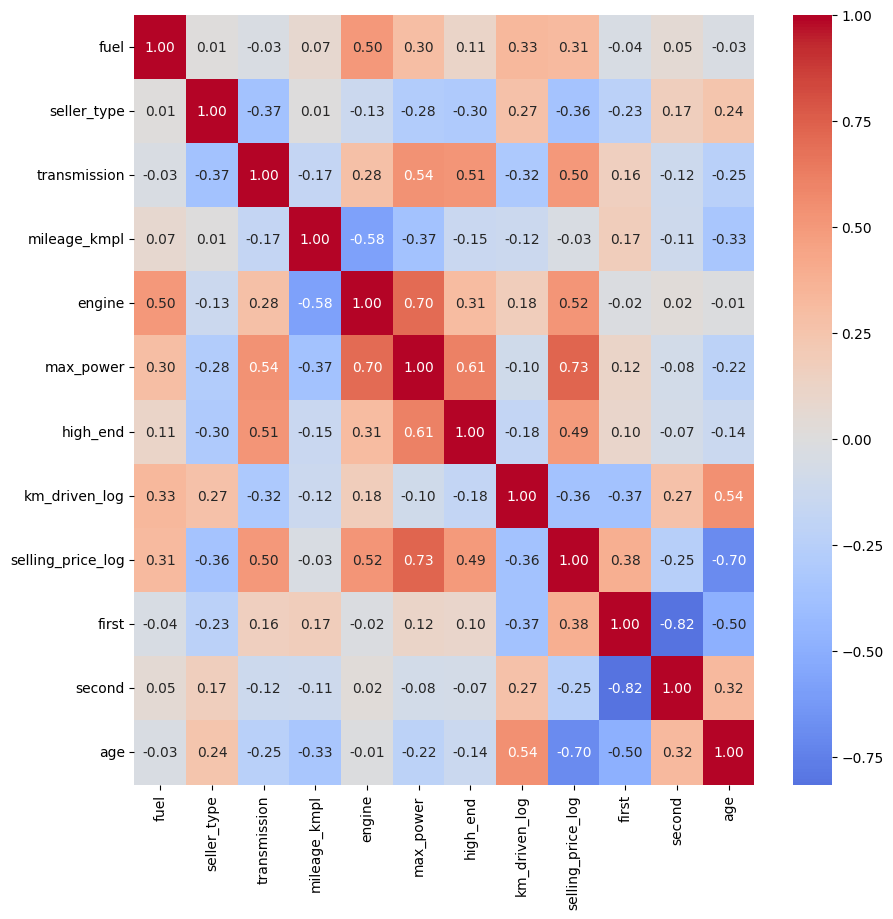

In [319]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt = '.2f', center=0)

In [320]:
# split data into X and y
X = data.drop('selling_price_log', axis=1)
y = data['selling_price_log']


In [332]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [333]:
# print a random sample from X_test as a dictionary WITHOUT THE INDEX
import json
X_test.sample().to_dict(orient='records')
json.dumps(X_test.sample().to_dict(orient='records'))

'[{"fuel": 1, "seller_type": 1, "transmission": 0, "mileage_kmpl": 2.2578617103410683, "engine": -0.42295149744954513, "max_power": -0.4993000582931646, "high_end": 0, "km_driven_log": -0.03346518725547796, "first": 1, "second": 0, "age": -1.0441885507223085}]'

In [334]:
X_train.columns

Index(['fuel', 'seller_type', 'transmission', 'mileage_kmpl', 'engine',
       'max_power', 'high_end', 'km_driven_log', 'first', 'second', 'age'],
      dtype='object')

In [335]:
# train a linear regression model with cross validation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print(rmse_scores)
print(rmse_scores.mean())



[0.28662645 0.2939606  0.29709024 0.29011721 0.29525778]
0.29261045708629885


In [336]:
# check the performance on test set
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [337]:
# calculate rmse
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [338]:
print(rmse)

0.28834556173692233


In [339]:
# check r2 score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8648671302030672

In [340]:
# other regression models
from sklearn.ensemble import RandomForestRegressor

In [341]:
# apply RandomForestRegressor
rf = RandomForestRegressor()
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print(rmse_scores)
print(rmse_scores.mean())


[0.21063225 0.20588916 0.20889604 0.20487983 0.20541132]
0.20714171941569698


In [342]:
# check the performance on test set
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [343]:
# check r2 score
r2_score(y_test, y_pred)

0.934744184095971

In [344]:
# check feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[f]]}: {importances[indices[f]]}")
    

max_power: 0.48982950285318505
age: 0.3866629349066189
engine: 0.051089109462419624
mileage_kmpl: 0.028678342779102157
km_driven_log: 0.02678665519880654
high_end: 0.00428556669600381
fuel: 0.004006523414363058
first: 0.003314176547899841
second: 0.002569752674189521
seller_type: 0.0016623277508193803
transmission: 0.0011151077165920083


In [345]:
# create a list with the model and the features using joblib
model = rf
features = X_train.columns
import joblib
joblib.dump((model, features), 'car-price-predict.pkl')



['car-price-predict.pkl']

In [346]:
print(features)

Index(['fuel', 'seller_type', 'transmission', 'mileage_kmpl', 'engine',
       'max_power', 'high_end', 'km_driven_log', 'first', 'second', 'age'],
      dtype='object')


In [347]:
# apply GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
scores = cross_val_score(gb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print(rmse_scores)
print(rmse_scores.mean())

[0.23682121 0.23402941 0.23567064 0.23359541 0.22840897]
0.23370512758865708


In [219]:
# check the performance on test set
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

In [220]:
# check r2 score
r2_score(y_test, y_pred)

0.9165781323939106

In [221]:
# check feature importance
feature_importances = gb.feature_importances_
indices = np.argsort(feature_importances)[::-1]
for f in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[f]]}: {feature_importances[indices[f]]}")

max_power: 0.4441991113541468
age: 0.43030017380841157
engine: 0.08538676748092261
km_driven_log: 0.009377243078669493
mileage_kmpl: 0.009339438858067107
high_end: 0.007339731649477455
fuel: 0.006987906954469214
transmission: 0.005367531834484676
second: 0.0008339022446026622
higher: 0.0008298338057741552
seller_type: 3.835893097422932e-05


In [222]:

def get_price(features):
    # for col in cols_to_scale:
    #     # scale the features and rehape (1, -1)
    #     features[col] = scalers[col].transform(np.array(features[col]).reshape(1, -1))
    df = pd.DataFrame([features])
    prediction = np.exp(model.predict(df))
    return int(prediction[0])


In [223]:
get_price(json.loads('{"fuel": 0, "seller_type": 1, "transmission": 0, "mileage_kmpl": 0.4232036792090107, "engine": -1.2855663003424584, "max_power": -1.0262610419172316, "high_end": 0, "km_driven_log": -0.443020315900675, "higher": false, "second": false, "age": 0.7787497782392092}'))

195028